**LAB5**: Exploring Kalman Tracking

In this lab, we will explore Kalman based fusion/tracking via a few exercises. Please write code or formula as asked for in the cells below.

In [1]:
%%capture
#above magic hides the output of this cell which is not very interesting

# Package for numerical linear algebra computations
import numpy as np

# package for plotting graphs
import matplotlib.pyplot as plt 

#import scipy's stats package
import scipy.stats as stat

#Posterior of a multivariate normal after measurement
Let $Z$ be a normally distributed random vector $\in$ $ℝ^n$ with $f_Z(z) = N(\mu_z, P_z)$ its probability density function.

Here $\mu_z \in ℝ^n, P_z \in ℝ^{nxn}$ are the mean and covariance of $Z$ respectively.

Let 

$Y = WZ + b$ 

be the measurement vector with $Y \in ℝ^m$ and $b$ is measurement noise. Lets assume that it is normally distributed with $f_b(b) = N(0,P_b)$ with $P_b \in ℝ^{mxm}$ the measurement noise covariance.

$W \in ℝ^{mxn}$ is the deterministic measurement matrix

Then: 

$f_{Y \mid Z}(y) = N(Wz,P_b)$ is the conditional density of $Y$ given $Z=z$

The joint distribution of $Z,Y$ is then given as:
$
f_{Z,Y}(z,y) = f_Z(z) f_{Y \mid Z}(y)
$

Using the formulae for the normal distribution and taking log we have:

$
-2ln(f_{Z,Y}(z,y) = (z-\mu_Z)^T P_Z^{-1} (z-\mu_Z) + (y-Wz)^T P_b^{-1} (y-Wz) + -2*log\ of\ normalization\  constants
$

Focusing only the quadratic terms, we can rewrite them:

Note that  $ y-Wz = (y - W\mu_Z) - W(z-\mu_Z)$.

Also $\mu_Y = W \mu_Z$.


Substituting in the quadratic and simplifying, it changes to: 
$
(z-\mu_Y)^T (P_Z^{-1}+W^TP_b^{-1}W) (z-\mu_Z)
+
(y-\mu_Y)^T P_b^{-1} (y-\mu_Y) -2(z-\mu_Z)^TW^TP_b^{-1}(y-\mu_Y)
$ 

Hence the joint distribution is given as:

$
f_{Z,Y}(z,y) = N(\begin{bmatrix} \mu_Z\\ \mu_Y \end{bmatrix}, P_{Z,Y}) \ \ \   (Eq. 1)
$

where $P_{Z,Y}^{-1} = \begin{bmatrix} P_Z^{-1}+W^T P_b^{-1}W & -W^TP_b^{-1}\\ -P_b^{-1}W & P_b^{-1}\end{bmatrix}
$

Applying the Sherman-Morrison-Woodward matrix inversion formula for 2x2 block matrices, we get :

$
P_{Z,Y} = \begin{bmatrix} P_Z & P_Z W^T \\ W P_Z & W P_Z W^T + P_b \end{bmatrix}
$

Factoring the by pre and post miltiplying with suitable block triangle matrices to get get block diagonal, we can write:

$
P_{Z,Y}^{-1} = \begin{bmatrix} I & 0 \\ -(W P_Z W^T + P_b)^{-1}WP_Z & I \end{bmatrix} \begin{bmatrix} (P_Z - P_Z W^T (W P_Z W^T + P_b)^{-1}WP_Z)^{-1} & 0 \\ 0 & (W P_Z W^T + P_b)^{-1} \end {bmatrix} \begin{bmatrix} I & -P_Z W^T (W P_Z W^T + P_b)^{-1}\\ 0 & I \end{bmatrix}
$

Substituting the above in the $Eq. 1$, we can refactor the joint distribution as:

$
f_{Z,Y}(z,y) = f_{Z \mid Y}(z)f_Y(y)
$

where 

$f_{Z \mid Y}(z) = N(z-\mu_{Z \mid Y}, P_{Z \mid Y})
$

and

$
\mu_{Z \mid Y} = \mu_Z + K(y-W\mu_Z)
$

$
P_{Z \mid Y} = (I-KW)P_Z 
$

$
K = P_Z W^T (WP_ZW^T+P_b)^{-1}
$

$K$ is the Kalman gain which is sort of the ratio of variable $Z$'s noise  impacting the measurement $P_ZW^T$ to the total noise which is the sum of the variable's noise and measurement noise (in a matrix sense). The posterior mean and covariance $(Z \mid Y)$ are updated from the prior $Z$ by using the gain $K$. Note that when the measurement noise is small, $K$ tends to be close to 1 (in its norm) and when it is very large, it tends to be 0 in its norm - which means discarding the measurement.
The measurement itself comes in as the innovation - difference from what is expected.


#Exercise 1: Find the optimal location of the temperature sensor
(10 points)
We want to find the optimal location to place a temperature sensor so that the over variance of measurement of temperature. between two locations is minimized.

We will capture our initial uncertainty in the temperatures at the two locations as:
z11_var : variance of temperature at location 1
z22_var : variance of temperature at location 2
z12_var = z21_var : co-variance

'a' is the location of the sensor from location 1, expressed as a fraction of distance between the two locations. So 'a' can range from 0 to 1.

We will assume that the temperature at a location at a distance 'a' is (1-a)*temp@loc1 + a*temp@loc 2.

P_y is sensor noise.

You will determine the quality of your estimate by
compting the norm of the posterior covariance $\parallel P_{Z \mid Y} \parallel$

Q1:
You need to find the optimal location - i.e. value of 'a' for these cases:

1. z11_var, z22_var, $\rho_{12}$ = 0.5, 1.0, 0.9

  a_best = $0.8$

2. z11_var, z22_var, $\rho_{12}$ = 1.0, 1.0, 0.9

  a_best = $0.5$

3. z11_var, z22_var, $\rho_{12}$ = 2.0, 1.0, 0.9

  a_best = $0.32$

4. z11_var, z22_var, $\rho_{12}$ = 2.0, 1.0, 0.1

  a_best = $0.11$


Q2:
Plot the graph of norm of posterior covariance with respect to be 'a' for case 1. (plot can be at the end of next cell)

Q3: Explain the results for your observations across cases 1-3 (i.e. increasing prior uncertainty at location 1) and also for cases 3-4 (lower correlation in uncertainties at the two locations)

If uncertainity in location-1 increases, then we should keep the sensor closer to T1 since it is less reliable at father distance. This is evident since $a_{best}$ keeps decreasing as variance in T1 keeps increasing. 

If the correlation between the two sensors is less, then we can be more sure that T1 is not much affected by T2, and since T1 has higher variance we keep the sensor closer to T1 to get more reliable readings. This can be clearly seen as $a_{best}$ decreases.



#####################################################
##################### Case: 1 #######################
best location =  0.8


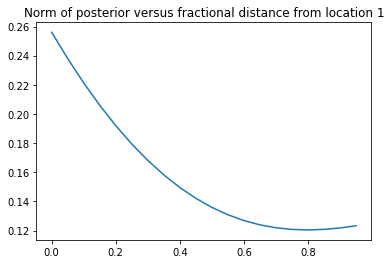



#####################################################
##################### Case: 2 #######################
best location =  0.5


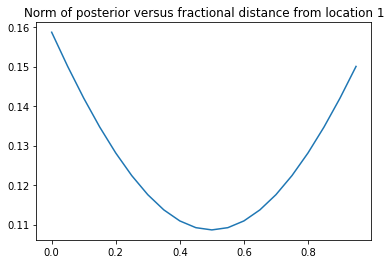



#####################################################
##################### Case: 3 #######################
best location =  0.30000000000000004


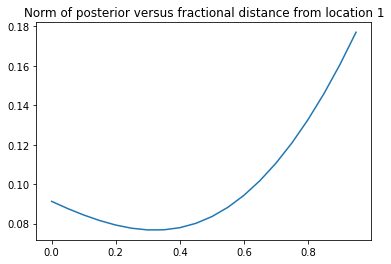



#####################################################
##################### Case: 4 #######################
best location =  0.1


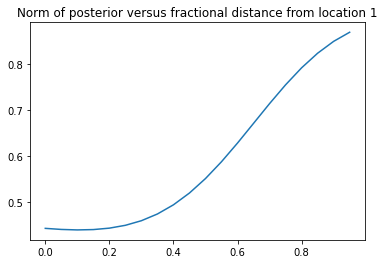

In [2]:
#replace <pass with your code>
z11_var_list = [0.5, 1.0, 2.0, 2.0]
z22_var_list = [1.0, 1.0, 1.0, 1.0]
rho_12_list = [0.9, 0.9, 0.9, 0.1]

mu_prior = np.array([23.5, 25.2])
P_y = 0.1 #Sensor noise covariance

#MEASUREMENT
y = 23.

# a is the fractional distance of sensor from first point 
# on the segment connecting the two locations
a_list = np.arange(0, 1.0, 0.05)

post_norm_list = []
best_post_norm_list = []
best_P_post_list = []
best_mu_post_list = []
a_best_list = []

for case in range(4):
  z11_var = z11_var_list[case]
  z22_var = z22_var_list[case]
  rho_12 = rho_12_list[case]

  z12_var = rho_12 * np.sqrt(z11_var*z22_var)
  z21_var = z12_var

  P_prior = np.array([[z11_var,z12_var],[z21_var,z22_var]])

  z_prior = stat.multivariate_normal(mu_prior,P_prior)

  prior_norm = np.linalg.norm(P_prior)

  post_norm = []
  best_post_norm = 10.
  best_P_post = P_prior
  best_mu_post = mu_prior
  a_best = 0
  for a in a_list:
    W = np.array([[1-a, a]])
    #we will assume that the temperature at any intermediate points is linear 
    #combination of the values at the two locations.
    mu_y = W @ mu_prior
    K = P_prior @ W.T @ np.linalg.inv(W @ P_prior @ W.T + P_y)
    i = (y - mu_y) #innovation
    mu_post = mu_prior + K @ i
    P_post = (np.eye(2) - K @ W) @ P_prior
    post_norm.append(np.linalg.norm(P_post)/prior_norm)
    if (post_norm[-1] < best_post_norm) :
      #keep track of the best  location and the posterior information
      best_post_norm = post_norm[-1]
      best_P_post = P_post
      best_mu_post = mu_post
      a_best = a

  post_norm_list.append(post_norm)
  best_post_norm_list.append(best_post_norm)
  best_P_post_list.append(best_P_post)
  best_mu_post_list.append(best_mu_post)
  a_best_list.append(a_best)

  print('\n\n#####################################################')
  print('##################### Case:', case + 1,'#######################')
  print("best location = ", a_best)
  plt.title("Norm of posterior versus fractional distance from location 1")
  plt.plot(a_list,post_norm)
  # print(prior_norm, post_norm)
  plt.show()


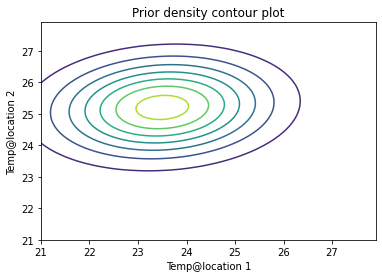

In [3]:
x,y = np.mgrid[21:28:0.1, 21:28:0.1]
pos = np.dstack((x,y))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Prior density contour plot")
ax.set_xlabel("Temp@location 1")
ax.set_ylabel("Temp@location 2")
ax.contour(x,y,z_prior.pdf(pos))
plt.show()

############# For Case: 1 #####################
Prior covariance norm =  2.2449944320643644
Posterior covariance norm =  0.1728485223856362


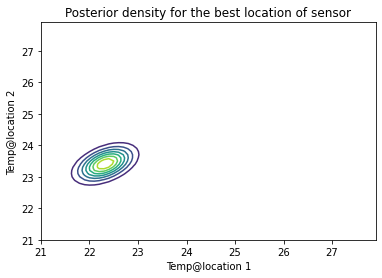

In [4]:
case = 0 # n-1
z_post = stat.multivariate_normal(best_mu_post_list[case], best_P_post_list[case])
print('############# For Case:', case + 1, '#####################')
print("Prior covariance norm = ", np.linalg.norm(P_prior))
print("Posterior covariance norm = ", np.linalg.norm(best_P_post_list[case]))
x,y = np.mgrid[21:28:0.1, 21:28:0.1]
pos = np.dstack((x,y))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Posterior density for the best location of sensor")
ax.set_xlabel("Temp@location 1")
ax.set_ylabel("Temp@location 2")
ax.contour(x,y,z_post.pdf(pos))
plt.show()

# Sensor fusion

Lest $Z$ be the quantity we want to measure and let $Y_1$ and $Y_2$ be the two measurements. 

i.e. we have 

$
Y_1 = W_1 Z + b_1
$

$
Y_2 = W_2 Z + b_2
$

where $W_1, W_2 \in ℝ^{mxn}$ are the measurement matrices and $b_1, b_2$ are the measurement noise which are zero mean and have covariances $P_{b1}, P_{b2}$

We want to determine the posterior, given the two measurements:

$f_{Z \mid Y_1, Y_2}(z)
$

Applying Bayes' theorem, we have:

$
f_{Z \mid Y_1, Y_2}(z) = \frac {f_{Y_1, Y_2 \mid Z}(y_1, y_2) f_Z(z)}{f_{Y_1,Y_2}(y_1, y_2)}
$

Given $Z$, we can assume that the two measurements are independent of each other, i.e,

$f_{Y_1, Y_2 \mid Z}(y_1, y_2) = f_{Y_1 \mid Z}(y_1) f_{Y_2 \mid Z}(y_2)$

Applying Bayes rule to each measurement on right side, we get :

$f_{Y_1, Y_2 \mid Z}(y_1,y_2) = \frac{f_{Z \mid Y_1}(z) f_{Y_1}(y_1)}{f_Z(z)}\frac{f_{Z \mid Y_2}(z) f_{Y_2}(y_2)}{f_Z(z)}
$ 

Hence we can write 

$
f_{Z \mid Y_1, Y_2}(z) = \gamma f_{Z\mid Y_1}(z)f_{Z\mid Y_2}(z) 
$

$
\gamma = \frac {f_{Y_1}(y_1)f_{Y_2}(y_2)}{f_{Y_1,Y_2}(y_1,y_2)f_Z(z)} 
$

Thus the posterior of the joint measurement is the product of the posterior given each measurement. From the previous section:

$
f_{Z \mid Y_1}(z) = N(\mu_{Z \mid Y_1}, P_{Z \mid Y_1}) = \frac {1}{\sqrt{{(2\pi)}^n |P_{Z\mid Y_1}|}} e^{-\frac {1}{2} (z - \mu_{Z \mid Y_1})^T P_{Z \mid Y_1}^{-1}(z - \mu_{Z \mid Y_1})} 
$

Multiplying the two measurement posteriors and looking only at the quadratic in the exponents, we have

$
(z - \mu_{Z \mid Y_1})^T P_{Z \mid Y_1}^{-1}(z - \mu_{Z \mid Y_1})  + (z - \mu_{Z \mid Y_2})^T P_{Z \mid Y_2}^{-1}(z - \mu_{Z \mid Y_2})
$

$
= z^T (P_{Z \mid Y_1}^{-1}+P_{Z\mid Y_2}^{-1}) z - 2 z^T (P_{Z \mid Y_1}^{-1}\mu_{Z\mid Y_1} + P_{Z \mid Y_2}^{-1}\mu_{Z\mid Y_2}) + other terms
$

Writing

$
P_{Z \mid Y_1, Y_2}^{-1} = P_{Z \mid Y_1}^{-1}+P_{Z\mid Y_2}^{-1}
$

and 

$
P_{Z \mid Y_1, Y_2}^{-1}\mu_{Z \mid Y_1, Y_2} = P_{Z \mid Y_1}^{-1}\mu_{Z\mid Y_1} + P_{Z \mid Y_2}^{-1}\mu_{Z\mid Y_2}
$

we can complete the square for the quadratic term above and absorbing everyting else into the normalizing factor for gaussian, we can write 

$
f_{Z \mid Y_1, Y_2}(z) = N(\mu_{Z \mid Y_1, Y_2}, P_{Z \mid Y_1, Y_2})
$

thus achieving fusion of sensor readings, by also considering their variances. 

Note that if the sensors have the same noise variances, then the result is a simple average! Otherwise it is a weighted average (with lower weight if the noise variance is higher)





#Exercise 2:Find the optimal location for the second temperature sensor
(10points)
For Case 3 above, viz., 

z11_var, z22_var, $\rho_{12}$ = 2.0, 1.0, 0.9

lets sensor 1's measurement $y_1$ have variance

$
\sigma_1^2 = 0.1
$
and it is at its best location you have found in the previous exercise.

If you had another sensor, whose variance is 

$
\sigma_2^2 = 0.2
$

Find the best location to place it so that you get the least posterior uncertainty for  $Z=[Z_1 Z_2]^T$

best location for sensors 1 and 2 are 0.3 and 0.2 respectively.

and plot the posterior density



In [5]:
# replace <pass> with your code
z11_var = 2.0
z22_var = 1.0
rho_12 = 0.9


z12_var = rho_12 * np.sqrt(z11_var*z22_var)
z21_var = z12_var

P_prior = np.array([[z11_var,z12_var],[z21_var,z22_var]])
mu_prior = np.array([23.5, 25.2])


z_prior = stat.multivariate_normal(mu_prior,P_prior)


P_y1 = 0.1 #1st sensor noise covariance
P_y2 = 0.2 #2nd sensor noise covariance

#MEASUREMENT
y1 = 23.
y2 = 23.3

#a1 is the fractional distance of sensor 1
#Find best location and assciated posteriors
a1_list = np.arange(0.0,1.0,0.05)
prior_norm = np.linalg.norm(P_prior)
best_post_norm_1 = 10.
best_P_post_1 = P_prior
best_mu_post_1 = mu_prior
a1_best = 0
post_norm_1 = []
for a1 in a1_list:
    W = np.array([[1-a1, a1]])
    #we will assume that the temperature at any intermediate points is linear 
    #combination of the values at the two locations.
    mu_y = W @ mu_prior
    K = P_prior @ W.T @ np.linalg.inv(W @ P_prior @ W.T + P_y1)
    i = (y1 - W @ mu_prior) #innovation
    mu_post_1 = mu_prior + K @ i
    P_post_1 = (np.eye(2) - K @ W) @ P_prior
    post_norm_1.append(np.linalg.norm(P_post_1)/prior_norm)  
    if (post_norm_1[-1] < best_post_norm_1) :
      #keep track of the best  location and the posterior information
      best_post_norm_1 = post_norm_1[-1]
      best_P_post_1 = P_post_1
      best_mu_post_1 = mu_post_1
      a1_best = a1


#a2 is the fractional distance of sensor 2
#Find best location and assciated posteriors
a2_list = np.arange(0.0,1.0,0.05)
prior_norm = np.linalg.norm(P_prior)
best_post_norm_2 = 10.
best_P_post_2 = P_prior
best_mu_post_2 = mu_prior
a2_best = 0
post_norm_2 = []
for a2 in a2_list:
  W = np.array([[1-a2, a2]])
  #we will assume that the temperature at any intermediate points is linear 
  #combination of the values at the two locations.
  mu_y = W @ mu_prior
  K = P_prior @ W.T @ np.linalg.inv(W @ P_prior @ W.T + P_y2)
  i = (y2 - W @ mu_prior) #innovation
  mu_post_2 = mu_prior + K @ i
  P_post_2 = (np.eye(2) - K @ W) @ P_prior
  post_norm_2.append(np.linalg.norm(P_post_2)/prior_norm)  
  if (post_norm_2[-1] < best_post_norm_2) :
    #keep track of the best  location and the posterior information
    best_post_norm_2 = post_norm_2[-1]
    best_P_post_2 = P_post_2
    best_mu_post_2 = mu_post_2
    a2_best = a2

print("best locations for sensors 1 & 2 are  = ", a1_best, a2_best)

P_post = np.linalg.inv((np.linalg.inv(best_P_post_1)+np.linalg.inv(best_P_post_2)))
mu_post = P_post @ (np.linalg.inv(best_P_post_1) @ best_mu_post_1
                                 +
                                 np.linalg.inv(best_P_post_2) @ best_mu_post_2
                                 )

best locations for sensors 1 & 2 are  =  0.30000000000000004 0.2


posterior mean from sensor 1 =  [22.44421868 24.49433102]
posterior mean from sensor 2 =  [22.98037932 24.85866837]
Fused posterior mean =  [22.6423348  24.61269531]
Posterior mean =  [22.6423348  24.61269531]
Posterior cov norm using only sensor 1 =  0.2204993611968795
Posterior cov norm using only sensor 1 =  0.34569704477127233
Fused posterior cov norm =  0.1313371671539202


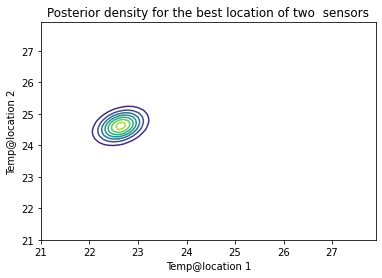

In [6]:
print ("posterior mean from sensor 1 = ", best_mu_post_1)
print ("posterior mean from sensor 2 = ", best_mu_post_2)
print ("Fused posterior mean = ", mu_post)


print ("Posterior mean = ", mu_post)
print ("Posterior cov norm using only sensor 1 = ", np.linalg.norm(best_P_post_1))
print ("Posterior cov norm using only sensor 1 = ", np.linalg.norm(best_P_post_2))
print ("Fused posterior cov norm = ",np.linalg.norm(P_post))

z_post = stat.multivariate_normal(mu_post,P_post)
x,y = np.mgrid[21:28:0.1, 21:28:0.1]
pos = np.dstack((x,y))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Posterior density for the best location of two  sensors")
ax.set_xlabel("Temp@location 1")
ax.set_ylabel("Temp@location 2")
ax.contour(x,y,z_post.pdf(pos))

#Exercise 3: Kalman filter for a linear dynamical system
(3 points)
We will now build upon the previous results to derive the optimal state estimate for a linear dynamical system, by combining state evolution based on the state transition equation, with measurements.

Let at time step $k$

$Z_k$ be the state of the system. We will model this as gaussian with mean $\mu_k$ and covariance $P_k$


$u_k$ be the input to the system

$A_k$ state transition matrix

$B_k$ be the input to state matrix

$N_k$ be the process noise which we will model as 0 mean gaussian with covariance $Q_k$

The dynamical evolution of the system is then given as 


$Z_{k+1} = A_k Z_k + B_k u_k + N_k$


$W_k$ be the measurment matrix

$S_k$ be the measurement noise with covariance $R_k$

$Y_k$ is the measurement and is given as

$Y_k = W_k Z_k + S_k$

Kalman tracking is done in two steps:
1. Predict step. Here we use the value at time k to predict the value at k+1 using the dynamical equation.

Let $Z_{k+1}^p$ be the predicted state at $k+1$

Note since all input variables are assumed to be distributed as gaussian, the outputs will also be gaussian. Hence we only need to keep track of the means and the co-variances

Then

$
\mu_{k+1}^p = A_k \mu_k + B_k u_k
$

$
P_{k+1}^p = A_k P_k A_k^T + Q_k
$

We can use these as prior to the measurement $Y_{k+1}$ as it measures $Z_{k+1}^p$

Therefore, using the formula derived above Exercise 1, the posterior is can be derived as


Kalman gain is:

$
K_{k+1} = P_{k+1}^p W_k^T (W_k P_{k+1}^p W_k^T + R_k)^{-1}
$

Covariance and mean of posterior of the state at $k+1$ are:

$
P_{k+1} = (I - K_{k+1} W_k) P_{k+1}^p
$

$
\mu_{k+1} = \mu_{k+1}^p + K_{k+1} (Y_{k+1} - W_k \mu_{k+1}^p)
$

#Exercise 4: Kalman Filter implementation.
(10 points)
Implement a Kalman based estimator for the temperature at the two locations, using the temperature readings from the sensors of Exercise 2 at  the locations you have determined.

Input, $u_k$ is a temperature change, provided by a temperature controller system (HVAC), which adds or removes temperature (technically heat) in proportion to $B_1$ and $B_2$ for each of the locations.
Here $B = \begin{bmatrix} B_1 \\ B_2 \end{bmatrix}$ with $B_1 = 0.9$ and $B_2 = 0.8$

Assume random process disturbance $N_k$ which is zero mean gaussian with covariance $Q_k = diag(0.3, 0.3)$

$
Z1_{k+1} = Z1_k - 0.1*(Z1_k - 0.5*(Z1_k + Z2_k))
$

$
Z2_{k+1} = Z2_k - 0.1*(Z2_k - 0.5*(Z1_k + Z2_k))
$




In [7]:
#< Your Code here>

#Some parameters
T = 1000 #total simulation time steps
#Process noise parameters
z_var = 2.0  #variance of each state variable
rho = 0.9    #correlation between them
# Measurement noise variance
r_var = 0.1


#State vector
Z = np.zeros((T,2,1))
Z[0] = [[23], [27]] #temperatures at time 0

muZ = np.zeros((T,2,1)) #state mean vector
#intialize the mean at time 0 to be the observation + some arbitatry offset
muZ[0,...] = Z[0,...] + [[3],[2]] 


P = np.zeros((T,2,2)) #State covariance matrix
P[0] = np.array([[1.,0],[0,1.]]) #initial uncertainty covariance - can be arbitary

#input vector
u = np.ones(T) 
u[int(T/2):T] = 0.0 #input is 0 for second half of simulation

#measurement vector
Y = np.zeros((T,2,1))

#System state transition matrix
A = np.array([[0.95,0.05],[0.05,0.95]])  #our model
Ar = np.array([[0.85,0.15],[0.15,0.85]]) #real parameter

#Input to state matrix
B = np.array([[0.9],[0.8]]) #our model
Br = B                      #real

#observation matrix
W = np.array([[0.7,0.3],[0.8,0.2]]) #our model
Wr = np.array([[0.8,0.2],[0.7,0.3]]) #real

#process noise covariance
Q = np.array([[z_var,rho*z_var],[rho*z_var,z_var]])


#measurement noise covariance
R = np.array([[r_var,0],[0,r_var]])

rng = np.random.default_rng(2365)
#Samples of  the Process noise  
n = rng.multivariate_normal(mean=np.zeros(2),cov=Q,size=(T))
#Samples of  the Measurement noise  
s = rng.multivariate_normal(mean=np.zeros(2),cov=R,size=(T))

#evolution of the process and the set of measurements
#this is typically from the real physical system 
#We are simulating it to mimic the real system 
for t in range(1,T):
  Z[t] = Ar @ Z[t-1] + Br * u[t-1] + n[t].reshape(2,1)
  Y[t] = Wr @ Z[t] + s[t].reshape(2,1)


# A few variables to help us plot the error 
# in estimated mean and the covariance norm
mu_err = np.zeros(T)
mu_err[0] = np.linalg.norm(muZ[0]-Z[0]) #initialize the value at time 0
P_norm = np.zeros(T)
P_norm[0] = np.linalg.norm(P[0])
#Kalman tracking
for t in range(1,T):
  #predict (use the model's matrices)
  muZ_Prior = A @ muZ[t-1, :] + B @ u[t-1].reshape(-1,1)
  P_Prior = A @ P[t-1,:] @ A.T + Q

  #Kalman Gain
  K = P_prior @ W.T @ np.linalg.inv(W @ P_prior @ W.T + R)

  #update
  P[t] = (np.eye(2,2) - K @ W) @ P_prior
  muZ[t] = muZ_Prior + K @ (Y[t, :] - W @ muZ_Prior)
  
  #error calculations
  mu_err[t] = np.linalg.norm(muZ[t]-Z[t])
  P_norm[t] = np.linalg.norm(P[t])

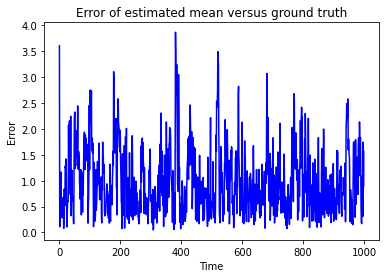

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time")
ax.set_ylabel("Error")
ax.set_title("Error of estimated mean versus ground truth")
ax.plot(range(T), mu_err,'b')

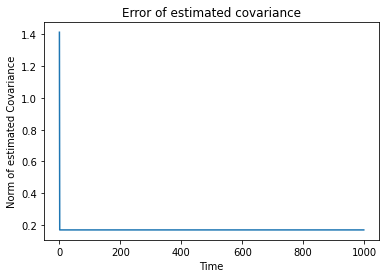

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time")
ax.set_ylabel("Norm of estimated Covariance")
ax.set_title("Error of estimated covariance")
plt.plot(range(T),P_norm)

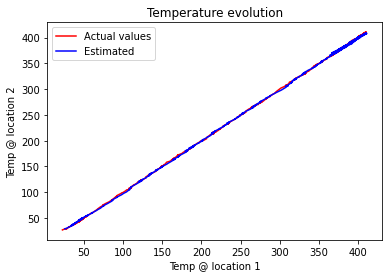

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Temperature evolution")
ax.set_xlabel("Temp @ location 1")
ax.set_ylabel("Temp @ location 2")
ax.plot(Z[:,0], Z[:,1],'r', label='Actual values')
ax.plot(muZ[:,0],muZ[:,1],'b', label='Estimated')
ax.legend()